In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
from scipy.signal import find_peaks
from scipy.stats import pearsonr

In [2]:
data = np.load("data/traces_0.npz", allow_pickle=True)
print(data.files)
print(data['dut_io_computed_data'].dtype)
print(f"Shape of traces captured is {data['wave'].shape}")
print(f"Shape of ciphertext data is {data['dut_io_computed_data'].shape}")
print(f"Shape of plaintext data is {data['dut_io_data'].shape}")

['wave', 'dut_io_data', 'dut_io_computed_data']
object
Shape of traces captured is (10000, 200)
Shape of ciphertext data is (10000,)
Shape of plaintext data is (10000,)


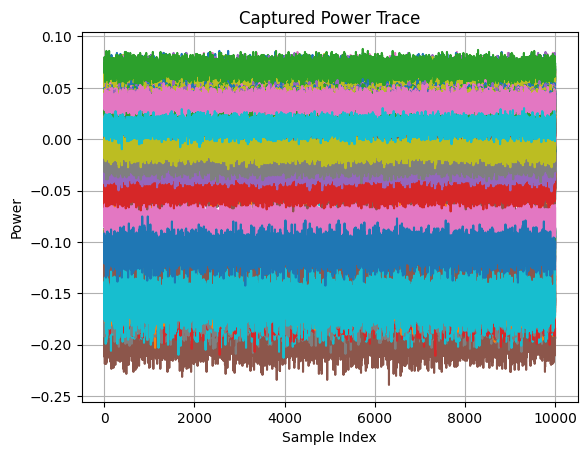

In [3]:
# Example: plot the waveform
waveform = data['wave']
plt.plot(waveform)
plt.title("Captured Power Trace")
plt.xlabel("Sample Index")
plt.ylabel("Power")
plt.grid(True)
plt.show()

In [4]:
SAMPLE_RATE_HZ = 29_500_000  # based on extclk_x4 * 7.37 MHz
time_axis = np.arange(waveform.shape[1]) / SAMPLE_RATE_HZ * 1e6  # time in µs

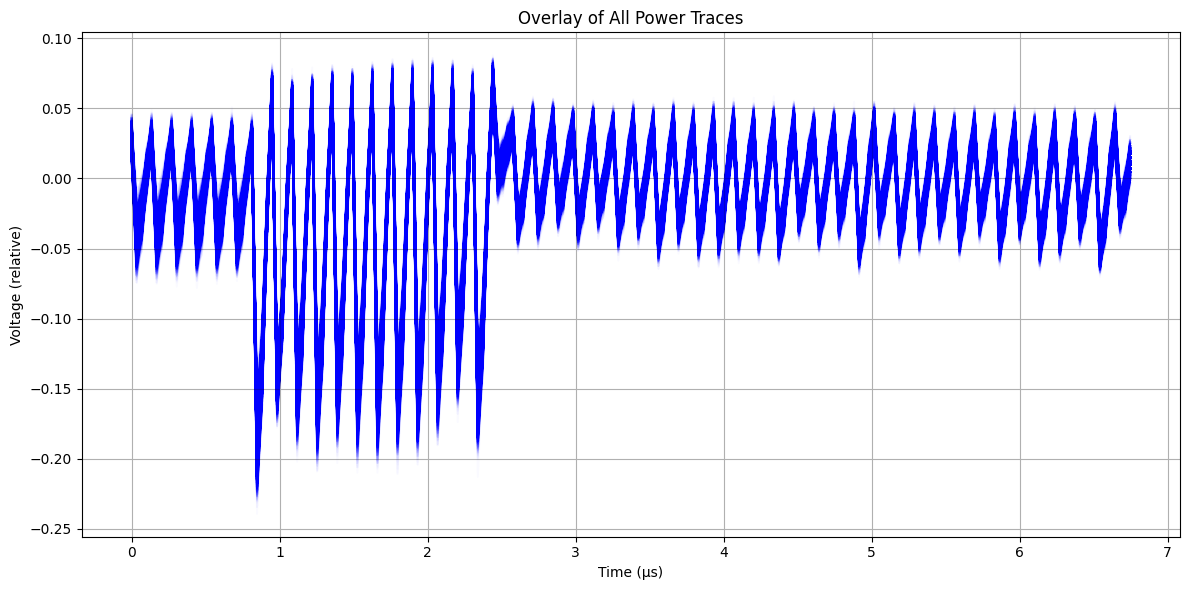

In [5]:
# === Plot all traces ===
plt.figure(figsize=(12, 6))
for trace in waveform:
    plt.plot(time_axis, trace, color='blue', alpha=0.02)  # alpha for transparency

plt.title("Overlay of All Power Traces")
plt.xlabel("Time (µs)")
plt.ylabel("Voltage (relative)")
plt.grid(True)
plt.tight_layout()
plt.show()

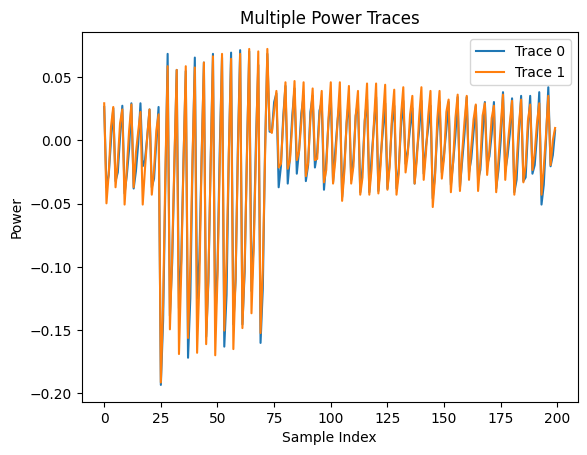

In [6]:
# multiple traces
for i in range(2):  # Plot first 2 traces
    plt.plot(data['wave'][i], label=f"Trace {i}")
plt.legend()
plt.title("Multiple Power Traces")
plt.xlabel("Sample Index")
plt.ylabel("Power")
plt.show()

# Attack Using S-Box output in the First round as intermediate Values

Calculating SNR...
Global SNR: 60.6287


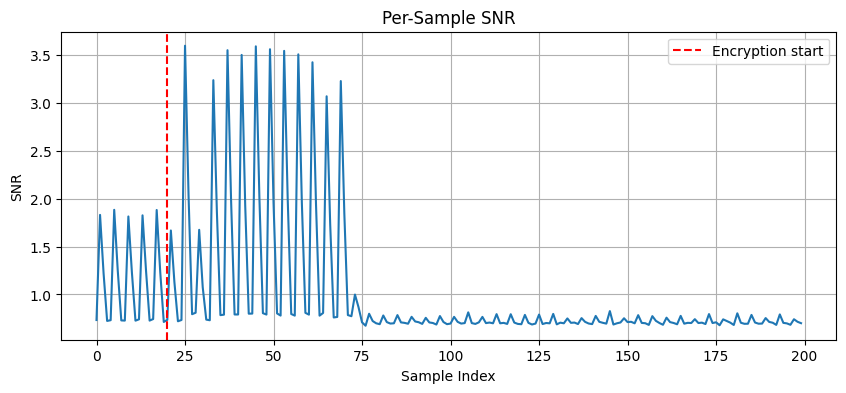

Detecting leakage window...
Detected first S-box peak at sample 25 (SNR: 3.60)


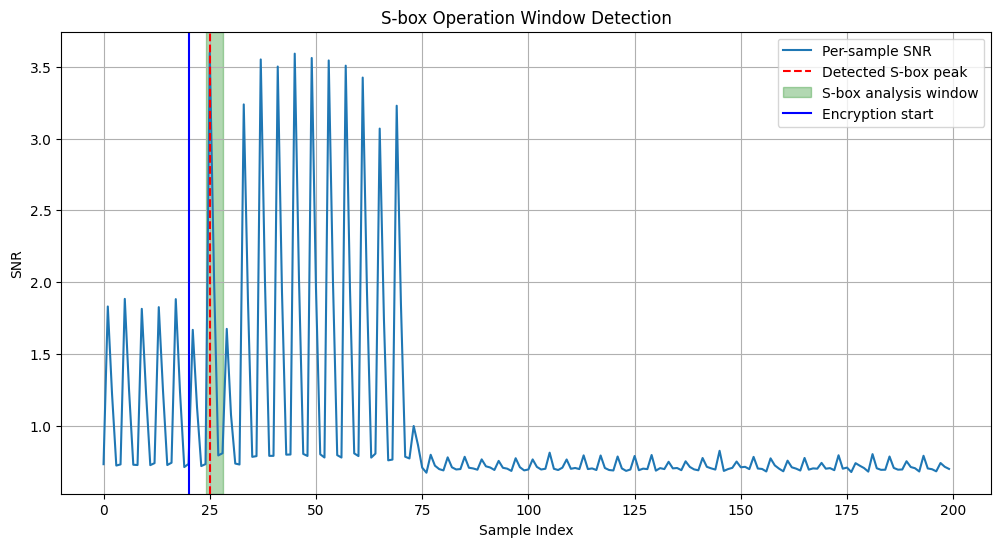

Focusing analysis on samples 24 to 28

Testing power models on first byte:
- hw        : Key 0x1d, Correlation 0.0325
- hd_in_out : Key 0x74, Correlation 0.0324
- value     : Key 0xac, Correlation 0.0362
- msb       : Key 0xf9, Correlation 0.0371

Selected power model: msb (correlation: 0.0371)

Recovering full key with CPA...
Byte  0: 0xf9 (corr: 0.0371)
Byte  1: 0x31 (corr: 0.0324)
Byte  2: 0x61 (corr: 0.0323)
Byte  3: 0x6b (corr: 0.0380)
Byte  4: 0x89 (corr: 0.0339)
Byte  5: 0xfd (corr: 0.0347)
Byte  6: 0xd5 (corr: 0.0325)
Byte  7: 0xd7 (corr: 0.0290)
Byte  8: 0xd7 (corr: 0.0315)
Byte  9: 0xa1 (corr: 0.0317)
Byte 10: 0xb8 (corr: 0.0376)
Byte 11: 0x6f (corr: 0.0343)
Byte 12: 0x42 (corr: 0.0431)
Byte 13: 0x0e (corr: 0.0372)
Byte 14: 0x0d (corr: 0.0363)
Byte 15: 0xea (corr: 0.0297)

Recovering full key with DPA...


DPA Byte 0: 100%|██████████| 256/256 [00:00<00:00, 903.66it/s]


Byte  0: 0xf9 (diff: 0.000871)


DPA Byte 1: 100%|██████████| 256/256 [00:00<00:00, 854.05it/s]


Byte  1: 0xe5 (diff: 0.000834)


DPA Byte 2: 100%|██████████| 256/256 [00:00<00:00, 699.35it/s]


Byte  2: 0x1e (diff: 0.000704)


DPA Byte 3: 100%|██████████| 256/256 [00:00<00:00, 868.35it/s]


Byte  3: 0xba (diff: 0.000777)


DPA Byte 4: 100%|██████████| 256/256 [00:00<00:00, 837.59it/s]


Byte  4: 0x89 (diff: 0.000875)


DPA Byte 5: 100%|██████████| 256/256 [00:00<00:00, 592.43it/s]


Byte  5: 0xfd (diff: 0.000804)


DPA Byte 6: 100%|██████████| 256/256 [00:00<00:00, 854.15it/s]


Byte  6: 0x40 (diff: 0.000605)


DPA Byte 7: 100%|██████████| 256/256 [00:00<00:00, 853.99it/s]


Byte  7: 0x4a (diff: 0.000720)


DPA Byte 8: 100%|██████████| 256/256 [00:00<00:00, 768.44it/s]


Byte  8: 0x55 (diff: 0.000750)


DPA Byte 9: 100%|██████████| 256/256 [00:00<00:00, 667.56it/s]


Byte  9: 0x5a (diff: 0.000815)


DPA Byte 10: 100%|██████████| 256/256 [00:00<00:00, 929.23it/s]


Byte 10: 0x26 (diff: 0.000944)


DPA Byte 11: 100%|██████████| 256/256 [00:00<00:00, 848.15it/s]


Byte 11: 0x90 (diff: 0.000815)


DPA Byte 12: 100%|██████████| 256/256 [00:00<00:00, 888.03it/s]


Byte 12: 0x96 (diff: 0.000786)


DPA Byte 13: 100%|██████████| 256/256 [00:00<00:00, 853.87it/s]


Byte 13: 0x62 (diff: 0.000808)


DPA Byte 14: 100%|██████████| 256/256 [00:00<00:00, 904.42it/s]


Byte 14: 0x0d (diff: 0.000703)


DPA Byte 15: 100%|██████████| 256/256 [00:00<00:00, 904.95it/s]

Byte 15: 0x8f (diff: 0.000719)

Key Verification:
True Key:     10a58869d74be5a374cf867cfb473859
CPA Recovered: f931616b89fdd5d7d7a1b86f420e0dea - FAILURE
DPA Recovered: f9e51eba89fd404a555a269096620d8f - FAILURE

Final Results:
CPA Key: f931616b89fdd5d7d7a1b86f420e0dea, Success: False
DPA Key: f9e51eba89fd404a555a269096620d8f, Success: False


In [7]:
  # AES S-box for intermediate value calculations
SBOX = np.array([
    0x63, 0x7c, 0x77, 0x7b, 0xf2, 0x6b, 0x6f, 0xc5, 0x30, 0x01, 0x67, 0x2b, 0xfe, 0xd7, 0xab, 0x76,
    0xca, 0x82, 0xc9, 0x7d, 0xfa, 0x59, 0x47, 0xf0, 0xad, 0xd4, 0xa2, 0xaf, 0x9c, 0xa4, 0x72, 0xc0,
    0xb7, 0xfd, 0x93, 0x26, 0x36, 0x3f, 0xf7, 0xcc, 0x34, 0xa5, 0xe5, 0xf1, 0x71, 0xd8, 0x31, 0x15,
    0x04, 0xc7, 0x23, 0xc3, 0x18, 0x96, 0x05, 0x9a, 0x07, 0x12, 0x80, 0xe2, 0xeb, 0x27, 0xb2, 0x75,
    0x09, 0x83, 0x2c, 0x1a, 0x1b, 0x6e, 0x5a, 0xa0, 0x52, 0x3b, 0xd6, 0xb3, 0x29, 0xe3, 0x2f, 0x84,
    0x53, 0xd1, 0x00, 0xed, 0x20, 0xfc, 0xb1, 0x5b, 0x6a, 0xcb, 0xbe, 0x39, 0x4a, 0x4c, 0x58, 0xcf,
    0xd0, 0xef, 0xaa, 0xfb, 0x43, 0x4d, 0x33, 0x85, 0x45, 0xf9, 0x02, 0x7f, 0x50, 0x3c, 0x9f, 0xa8,
    0x51, 0xa3, 0x40, 0x8f, 0x92, 0x9d, 0x38, 0xf5, 0xbc, 0xb6, 0xda, 0x21, 0x10, 0xff, 0xf3, 0xd2,
    0xcd, 0x0c, 0x13, 0xec, 0x5f, 0x97, 0x44, 0x17, 0xc4, 0xa7, 0x7e, 0x3d, 0x64, 0x5d, 0x19, 0x73,
    0x60, 0x81, 0x4f, 0xdc, 0x22, 0x2a, 0x90, 0x88, 0x46, 0xee, 0xb8, 0x14, 0xde, 0x5e, 0x0b, 0xdb,
    0xe0, 0x32, 0x3a, 0x0a, 0x49, 0x06, 0x24, 0x5c, 0xc2, 0xd3, 0xac, 0x62, 0x91, 0x95, 0xe4, 0x79,
    0xe7, 0xc8, 0x37, 0x6d, 0x8d, 0xd5, 0x4e, 0xa9, 0x6c, 0x56, 0xf4, 0xea, 0x65, 0x7a, 0xae, 0x08,
    0xba, 0x78, 0x25, 0x2e, 0x1c, 0xa6, 0xb4, 0xc6, 0xe8, 0xdd, 0x74, 0x1f, 0x4b, 0xbd, 0x8b, 0x8a,
    0x70, 0x3e, 0xb5, 0x66, 0x48, 0x03, 0xf6, 0x0e, 0x61, 0x35, 0x57, 0xb9, 0x86, 0xc1, 0x1d, 0x9e,
    0xe1, 0xf8, 0x98, 0x11, 0x69, 0xd9, 0x8e, 0x94, 0x9b, 0x1e, 0x87, 0xe9, 0xce, 0x55, 0x28, 0xdf,
    0x8c, 0xa1, 0x89, 0x0d, 0xbf, 0xe6, 0x42, 0x68, 0x41, 0x99, 0x2d, 0x0f, 0xb0, 0x54, 0xbb, 0x16
], dtype=np.uint8)

class PowerAnalyzer:
    """
    Enhanced power analysis focused on encryption period starting at sample 20.
    Performs DPA and CPA attacks to recover all AES key bytes.
    
    Attributes:
        traces (np.ndarray): Power traces (num_traces x trace_length)
        plaintexts (np.ndarray): Plaintext integers (num_traces)
        trace_length (int): Length of each power trace
        num_traces (int): Number of captured traces
        encryption_start (int): Sample index where encryption begins
        leakage_window (tuple): Time window containing first-round S-box operations
    """
    
    def __init__(self, traces, plaintexts, encryption_start=20):
        """
        Initialize the power analyzer with captured data.
        
        Args:
            traces: Array of power traces (num_traces x trace_length)
            plaintexts: Array of plaintext integers (num_traces)
            encryption_start: Sample index where encryption begins (default=20)
        """
        self.traces = traces
        self.plaintexts = plaintexts
        self.num_traces, self.trace_length = traces.shape
        self.encryption_start = encryption_start
        self.leakage_window = None  # Will be set after detection
        
    def detect_leakage_window(self, snr_per_sample, plot=True):
        """
        Detect the time window containing first-round S-box operations.
        Focuses analysis on the encryption period starting at self.encryption_start.
        
        Methodology:
        1. Analyze only samples after encryption_start
        2. Identify significant peaks in SNR
        3. Create window around the first major peak
        
        Args:
            snr_per_sample: SNR values for each sample point
            plot: Whether to visualize the detected window
            
        Returns:
            tuple: (start, end) of detected leakage window
        """
        # Focus analysis on encryption period
        analysis_samples = snr_per_sample[self.encryption_start:]
        
        # Find significant peaks in SNR
        peaks, properties = find_peaks(
            analysis_samples, 
            height=0.3 * np.max(analysis_samples), 
            distance=5
        )
        
        if len(peaks) == 0:
            # Fallback to max SNR point
            peak_idx = np.argmax(analysis_samples) + self.encryption_start
            print(f"No clear peaks found, using max SNR at sample {peak_idx}")
        else:
            # Select the first significant peak
            peak_idx = peaks[0] + self.encryption_start
            print(f"Detected first S-box peak at sample {peak_idx} (SNR: {snr_per_sample[peak_idx]:.2f})")
        
        # Create window around the peak (4 samples before, 8 after)
        window_start = max(self.encryption_start, peak_idx - 1)
        window_end = min(self.trace_length, peak_idx + 3)
        self.leakage_window = (window_start, window_end)
        
        if plot:
            plt.figure(figsize=(12, 6))
            plt.plot(snr_per_sample, label="Per-sample SNR")
            plt.axvline(peak_idx, color='r', linestyle='--', label="Detected S-box peak")
            plt.axvspan(window_start, window_end, alpha=0.3, color='g', label="S-box analysis window")
            plt.axvline(self.encryption_start, color='b', linestyle='-', label="Encryption start")
            plt.title("S-box Operation Window Detection")
            plt.xlabel("Sample Index")
            plt.ylabel("SNR")
            plt.legend()
            plt.grid(True)
            plt.show()
            
        return self.leakage_window
    
    def calculate_snr(self):
        """
        Calculate Signal-to-Noise Ratio (SNR) for each point in the trace.
        Focuses on encryption period starting at self.encryption_start.
        
        Returns:
            float: Global SNR value
            np.ndarray: SNR values per sample point
        """
        # Calculate mean and variance for each point across all traces
        mean_trace = np.mean(self.traces, axis=0)
        var_trace = np.var(self.traces, axis=0)
        
        # Signal: variance of the mean trace
        signal = np.var(mean_trace)
        # Noise: average variance across traces
        noise = np.mean(var_trace)
        
        # Per-sample SNR: variance at each point divided by average variance
        snr_per_sample = np.zeros(self.trace_length)
        if noise > 0:
            snr_per_sample = var_trace / noise
            
        return signal / noise, snr_per_sample
    
    def dpa_attack(self, target_byte=0, bit_index=7):
        """
        Perform Differential Power Analysis (DPA) focused on leakage window.
        
        Steps:
        1. Extract target byte from each plaintext
        2. For each key guess (0-255):
            a. Compute S-box input: plaintext_byte XOR key_guess
            b. Compute intermediate value: S-box output
            c. Partition traces based on selected bit of intermediate value
            d. Calculate mean power difference between groups
        3. Identify key guess with maximum difference

        Args:
            target_byte: Which byte of the key to attack (0-15)
            bit_index: Which bit to use for partitioning (0-7, MSB=7)
            
        Returns:
            tuple: (best_key_guess, max_difference, differences)
        """
        if self.leakage_window is None:
            raise ValueError("Leakage window not detected. Run detect_leakage_window() first.")
        
        start_idx, end_idx = self.leakage_window
        traces_window = self.traces[:, start_idx:end_idx]
        window_length = end_idx - start_idx
        
        differences = np.zeros((256, window_length))
        
        # Extract target byte from each plaintext
        plaintext_bytes = np.array([(p >> (8*(15-target_byte))) & 0xFF for p in self.plaintexts])
        
        for kguess in tqdm(range(256), desc=f"DPA Byte {target_byte}"):
            # Calculate S-box outputs for all traces
            sbox_output = SBOX[plaintext_bytes ^ kguess]
            
            # Split traces based on selected bit
            bit_mask = 1 << bit_index
            group0 = traces_window[(sbox_output & bit_mask) == 0]
            group1 = traces_window[(sbox_output & bit_mask) != 0]
            
            # Calculate mean difference between groups
            mean0 = np.mean(group0, axis=0) if len(group0) > 0 else np.zeros(window_length)
            mean1 = np.mean(group1, axis=0) if len(group1) > 0 else np.zeros(window_length)
            differences[kguess] = np.abs(mean0 - mean1)
        
        # Find key guess with maximum difference at any point
        max_differences = np.max(differences, axis=1)
        best_key_guess = np.argmax(max_differences)
        max_difference = max_differences[best_key_guess]
        
        return best_key_guess, max_difference, differences
    
    def cpa_attack(self, target_byte=0, power_model='hw'):
        """
        Perform Correlation Power Analysis (CPA) focused on leakage window.
        Supports multiple power models for better matching device characteristics.
        
        Args:
            target_byte: Which byte of the key to attack (0-15)
            power_model: Power model type ('hw', 'hd_in_out', 'value', etc.)
            
        Returns:
            tuple: (best_key_guess, max_correlation, correlations)
        """
        if self.leakage_window is None:
            raise ValueError("Leakage window not detected. Run detect_leakage_window() first.")
            
        start_idx, end_idx = self.leakage_window
        traces_window = self.traces[:, start_idx:end_idx]
        window_length = end_idx - start_idx
        
        # Extract target byte from each plaintext
        plaintext_bytes = np.array([(p >> (8*(15-target_byte))) & 0xFF for p in self.plaintexts])
        
        # Preallocate arrays
        correlations = np.zeros((256, window_length))
        hypothetical_power = np.zeros((256, self.num_traces))
        
        for kguess in range(256):
            # Compute intermediate values
            sbox_input = plaintext_bytes ^ kguess
            sbox_output = SBOX[sbox_input]
            
            # Apply selected power model
            if power_model == 'hw':  # Hamming weight of output
                hyp = np.array([bin(s).count('1') for s in sbox_output])
            elif power_model == 'hd_in_out':  # Hamming distance input->output
                hyp = np.array([bin(i ^ o).count('1') for i, o in zip(sbox_input, sbox_output)])
            elif power_model == 'value':  # Raw intermediate value
                hyp = sbox_output.astype(float)
            elif power_model == 'msb':  # Most significant bit
                hyp = (sbox_output >> 7) & 0x01
            else:
                raise ValueError(f"Unsupported power model: {power_model}")
                
            hypothetical_power[kguess] = hyp
        
        # Calculate correlations in window
        for j in range(window_length):
            for kguess in range(256):
                corr, _ = pearsonr(hypothetical_power[kguess], traces_window[:, j])
                correlations[kguess, j] = np.abs(corr)
        
        # Find key guess with maximum correlation at any point
        max_correlations = np.max(correlations, axis=1)
        best_key_guess = np.argmax(max_correlations)
        max_correlation = max_correlations[best_key_guess]
        
        return best_key_guess, max_correlation, correlations
    
    def recover_full_key(self, true_key=None, power_model='hd_in_out'):
        """
        Recover all 16 bytes of the AES key using CPA and DPA attacks.
        
        Args:
            true_key: Known key for verification (optional)
            power_model: Power model to use for CPA
            
        Returns:
            dict: Results including recovered keys and verification
        """
        results = {
            'cpa_key': bytearray(16),
            'dpa_key': bytearray(16),
            'cpa_success': False,
            'dpa_success': False,
            'cpa_correlations': [],
            'dpa_differences': []
        }
        
        # Recover key using CPA
        print("\nRecovering full key with CPA...")
        for byte_idx in range(16):
            best_byte, max_corr, _ = self.cpa_attack(target_byte=byte_idx, power_model=power_model)
            results['cpa_key'][byte_idx] = best_byte
            results['cpa_correlations'].append(max_corr)
            print(f"Byte {byte_idx:2d}: 0x{best_byte:02x} (corr: {max_corr:.4f})")
        
        # Recover key using DPA
        print("\nRecovering full key with DPA...")
        for byte_idx in range(16):
            best_byte, max_diff, _ = self.dpa_attack(target_byte=byte_idx)
            results['dpa_key'][byte_idx] = best_byte
            results['dpa_differences'].append(max_diff)
            print(f"Byte {byte_idx:2d}: 0x{best_byte:02x} (diff: {max_diff:.6f})")
        
        # Verify against known key if available
        if true_key is not None:
            true_bytes = true_key.to_bytes(16, 'big')
            results['cpa_success'] = results['cpa_key'] == true_bytes
            results['dpa_success'] = results['dpa_key'] == true_bytes
            
            print("\nKey Verification:")
            print(f"True Key:     {true_bytes.hex()}")
            print(f"CPA Recovered: {results['cpa_key'].hex()} - {'SUCCESS' if results['cpa_success'] else 'FAILURE'}")
            print(f"DPA Recovered: {results['dpa_key'].hex()} - {'SUCCESS' if results['dpa_success'] else 'FAILURE'}")
        
        return results

def analyze_captured_data(traces, plaintexts, true_key=None):
    """
    Comprehensive power analysis focused on encryption period starting at sample 20.
    Performs DPA and CPA attacks to recover all AES key bytes.
    
    Args:
        traces: Captured power traces
        plaintexts: Corresponding plaintext inputs
        true_key: Known key for verification (optional)
    """
    # Initialize analyzer with known encryption start point
    analyzer = PowerAnalyzer(traces, plaintexts, encryption_start=20)
    
    # 1. Calculate and plot SNR
    print("Calculating SNR...")
    global_snr, snr_per_sample = analyzer.calculate_snr()
    print(f"Global SNR: {global_snr:.4f}")
    
    # Plot SNR per sample
    plt.figure(figsize=(10, 4))
    plt.plot(snr_per_sample)
    plt.axvline(20, color='r', linestyle='--', label="Encryption start")
    plt.title("Per-Sample SNR")
    plt.xlabel("Sample Index")
    plt.ylabel("SNR")
    plt.grid(True)
    plt.legend()
    plt.show()
    
    # 2. Detect leakage window
    print("Detecting leakage window...")
    leakage_window = analyzer.detect_leakage_window(snr_per_sample)
    print(f"Focusing analysis on samples {leakage_window[0]} to {leakage_window[1]}")
    
    # 3. Test different power models on first byte
    models = ['hw', 'hd_in_out', 'value', 'msb']
    best_model = None
    best_corr = 0
    
    print("\nTesting power models on first byte:")
    for model in models:
        key_guess, max_corr, _ = analyzer.cpa_attack(target_byte=0, power_model=model)
        print(f"- {model:10}: Key 0x{key_guess:02x}, Correlation {max_corr:.4f}")
        if max_corr > best_corr:
            best_corr = max_corr
            best_model = model
    
    print(f"\nSelected power model: {best_model} (correlation: {best_corr:.4f})")
    
    # 4. Recover full key using best model
    results = analyzer.recover_full_key(true_key=true_key, power_model=best_model)
    
    return results

# Main execution
if __name__ == "__main__":
    # Load your data
    traces = data['wave'] # shape (10000, 200)
    plaintexts = data['dut_io_data'] # shape (10000,)
    ciphertexts = data['dut_io_computed_data'] # shape (10000,)
    
    # Known true key for verification
    true_key = 0x10a58869d74be5a374cf867cfb473859
    
    # Run analysis
    results = analyze_captured_data(traces, plaintexts, true_key=true_key)
    
    # Print final results
    print("\nFinal Results:")
    print(f"CPA Key: {results['cpa_key'].hex()}, Success: {results['cpa_success']}")
    print(f"DPA Key: {results['dpa_key'].hex()}, Success: {results['dpa_success']}")

# Attack Using the Last Round of AES

Calculating SNR...
Global SNR: 60.6287


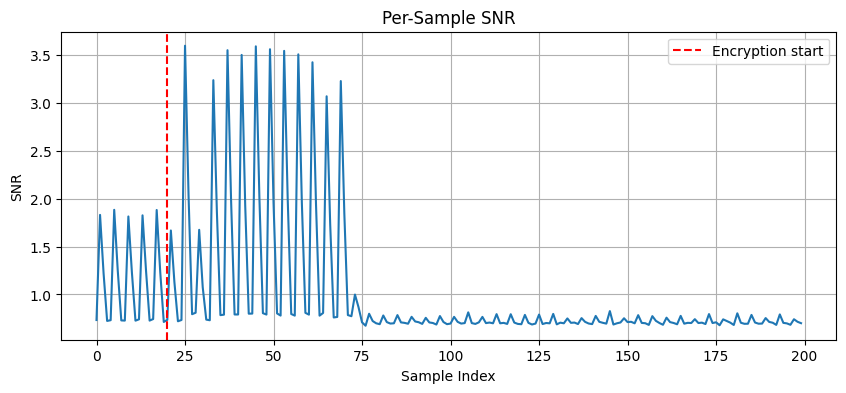

Detecting last-round leakage window...
Detected last S-box peak at sample 69 (SNR: 3.23)


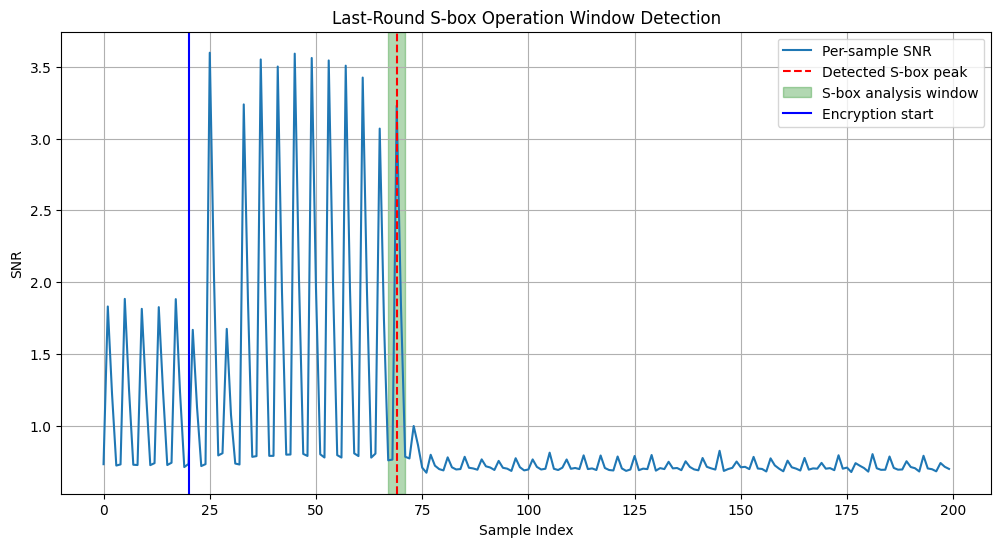

Focusing analysis on samples 67 to 71

Testing power model on first byte:


CPA Byte 0: 100%|██████████| 256/256 [00:04<00:00, 63.26it/s]


- Key 0xd5, Correlation 0.1531

Recovering last round key with CPA...


CPA Byte 0: 100%|██████████| 256/256 [00:03<00:00, 66.11it/s]


Byte  0: 0xd5 (corr: 0.1531)


CPA Byte 1: 100%|██████████| 256/256 [00:03<00:00, 65.52it/s]


Byte  1: 0x20 (corr: 0.0355)


CPA Byte 2: 100%|██████████| 256/256 [00:04<00:00, 62.16it/s]


Byte  2: 0x6a (corr: 0.0337)


CPA Byte 3: 100%|██████████| 256/256 [00:03<00:00, 65.77it/s]


Byte  3: 0x93 (corr: 0.0305)


CPA Byte 4: 100%|██████████| 256/256 [00:03<00:00, 67.17it/s]


Byte  4: 0x43 (corr: 0.1668)


CPA Byte 5: 100%|██████████| 256/256 [00:03<00:00, 65.19it/s]


Byte  5: 0x00 (corr: 0.0321)


CPA Byte 6: 100%|██████████| 256/256 [00:03<00:00, 66.83it/s]


Byte  6: 0x11 (corr: 0.0326)


CPA Byte 7: 100%|██████████| 256/256 [00:03<00:00, 66.04it/s]


Byte  7: 0x2c (corr: 0.0368)


CPA Byte 8: 100%|██████████| 256/256 [00:04<00:00, 63.86it/s]


Byte  8: 0xc0 (corr: 0.1553)


CPA Byte 9: 100%|██████████| 256/256 [00:03<00:00, 65.40it/s]


Byte  9: 0x28 (corr: 0.0381)


CPA Byte 10: 100%|██████████| 256/256 [00:03<00:00, 66.06it/s]


Byte 10: 0x9c (corr: 0.0304)


CPA Byte 11: 100%|██████████| 256/256 [00:04<00:00, 62.12it/s]


Byte 11: 0x7e (corr: 0.0327)


CPA Byte 12: 100%|██████████| 256/256 [00:03<00:00, 64.69it/s]


Byte 12: 0x1d (corr: 0.1841)


CPA Byte 13: 100%|██████████| 256/256 [00:03<00:00, 65.14it/s]


Byte 13: 0xe5 (corr: 0.0323)


CPA Byte 14: 100%|██████████| 256/256 [00:04<00:00, 61.09it/s]


Byte 14: 0xfe (corr: 0.0366)


CPA Byte 15: 100%|██████████| 256/256 [00:03<00:00, 64.85it/s]


Byte 15: 0x7d (corr: 0.0418)

Recovering last round key with DPA...


DPA Byte 0: 100%|██████████| 256/256 [00:02<00:00, 114.45it/s]


Byte  0: 0x0a (diff: 0.001219)


DPA Byte 1: 100%|██████████| 256/256 [00:02<00:00, 113.06it/s]


Byte  1: 0xf5 (diff: 0.001066)


DPA Byte 2: 100%|██████████| 256/256 [00:02<00:00, 114.96it/s]


Byte  2: 0xf6 (diff: 0.001154)


DPA Byte 3: 100%|██████████| 256/256 [00:02<00:00, 116.99it/s]


Byte  3: 0xc6 (diff: 0.001007)


DPA Byte 4: 100%|██████████| 256/256 [00:02<00:00, 112.40it/s]


Byte  4: 0xe0 (diff: 0.001182)


DPA Byte 5: 100%|██████████| 256/256 [00:02<00:00, 117.96it/s]


Byte  5: 0x11 (diff: 0.001089)


DPA Byte 6: 100%|██████████| 256/256 [00:02<00:00, 110.57it/s]


Byte  6: 0x53 (diff: 0.000671)


DPA Byte 7: 100%|██████████| 256/256 [00:02<00:00, 101.15it/s]


Byte  7: 0x84 (diff: 0.000883)


DPA Byte 8: 100%|██████████| 256/256 [00:02<00:00, 105.24it/s]


Byte  8: 0x38 (diff: 0.000988)


DPA Byte 9: 100%|██████████| 256/256 [00:02<00:00, 108.80it/s]


Byte  9: 0x87 (diff: 0.000748)


DPA Byte 10: 100%|██████████| 256/256 [00:02<00:00, 85.90it/s]


Byte 10: 0xfe (diff: 0.000927)


DPA Byte 11: 100%|██████████| 256/256 [00:02<00:00, 100.66it/s]


Byte 11: 0xff (diff: 0.000862)


DPA Byte 12: 100%|██████████| 256/256 [00:02<00:00, 85.93it/s]


Byte 12: 0xe7 (diff: 0.001156)


DPA Byte 13: 100%|██████████| 256/256 [00:02<00:00, 86.49it/s]


Byte 13: 0xcf (diff: 0.000936)


DPA Byte 14: 100%|██████████| 256/256 [00:03<00:00, 80.87it/s] 


Byte 14: 0x21 (diff: 0.000851)


DPA Byte 15: 100%|██████████| 256/256 [00:02<00:00, 109.62it/s]

Byte 15: 0x8d (diff: 0.000933)

Key Verification:
True Key:            10a58869d74be5a374cf867cfb473859
CPA Original Key:    588eb25674f27405413e976f5921fb91 - FAILURE
DPA Original Key:    5af1b71091e6b4128d6a00d604c1f0d6 - FAILURE
CPA Last Round Key:  d5206a934300112cc0289c7e1de5fe7d
DPA Last Round Key:  0af5f6c6e01153843887feffe7cf218d

Final Results:
CPA Key: d5206a934300112cc0289c7e1de5fe7d, Success: False
DPA Key: 0af5f6c6e01153843887feffe7cf218d, Success: False


In [ ]:
# Standard AES S-box
SBOX = np.array([
    0x63, 0x7c, 0x77, 0x7b, 0xf2, 0x6b, 0x6f, 0xc5, 0x30, 0x01, 0x67, 0x2b, 0xfe, 0xd7, 0xab, 0x76,
    0xca, 0x82, 0xc9, 0x7d, 0xfa, 0x59, 0x47, 0xf0, 0xad, 0xd4, 0xa2, 0xaf, 0x9c, 0xa4, 0x72, 0xc0,
    0xb7, 0xfd, 0x93, 0x26, 0x36, 0x3f, 0xf7, 0xcc, 0x34, 0xa5, 0xe5, 0xf1, 0x71, 0xd8, 0x31, 0x15,
    0x04, 0xc7, 0x23, 0xc3, 0x18, 0x96, 0x05, 0x9a, 0x07, 0x12, 0x80, 0xe2, 0xeb, 0x27, 0xb2, 0x75,
    0x09, 0x83, 0x2c, 0x1a, 0x1b, 0x6e, 0x5a, 0xa0, 0x52, 0x3b, 0xd6, 0xb3, 0x29, 0xe3, 0x2f, 0x84,
    0x53, 0xd1, 0x00, 0xed, 0x20, 0xfc, 0xb1, 0x5b, 0x6a, 0xcb, 0xbe, 0x39, 0x4a, 0x4c, 0x58, 0xcf,
    0xd0, 0xef, 0xaa, 0xfb, 0x43, 0x4d, 0x33, 0x85, 0x45, 0xf9, 0x02, 0x7f, 0x50, 0x3c, 0x9f, 0xa8,
    0x51, 0xa3, 0x40, 0x8f, 0x92, 0x9d, 0x38, 0xf5, 0xbc, 0xb6, 0xda, 0x21, 0x10, 0xff, 0xf3, 0xd2,
    0xcd, 0x0c, 0x13, 0xec, 0x5f, 0x97, 0x44, 0x17, 0xc4, 0xa7, 0x7e, 0x3d, 0x64, 0x5d, 0x19, 0x73,
    0x60, 0x81, 0x4f, 0xdc, 0x22, 0x2a, 0x90, 0x88, 0x46, 0xee, 0xb8, 0x14, 0xde, 0x5e, 0x0b, 0xdb,
    0xe0, 0x32, 0x3a, 0x0a, 0x49, 0x06, 0x24, 0x5c, 0xc2, 0xd3, 0xac, 0x62, 0x91, 0x95, 0xe4, 0x79,
    0xe7, 0xc8, 0x37, 0x6d, 0x8d, 0xd5, 0x4e, 0xa9, 0x6c, 0x56, 0xf4, 0xea, 0x65, 0x7a, 0xae, 0x08,
    0xba, 0x78, 0x25, 0x2e, 0x1c, 0xa6, 0xb4, 0xc6, 0xe8, 0xdd, 0x74, 0x1f, 0x4b, 0xbd, 0x8b, 0x8a,
    0x70, 0x3e, 0xb5, 0x66, 0x48, 0x03, 0xf6, 0x0e, 0x61, 0x35, 0x57, 0xb9, 0x86, 0xc1, 0x1d, 0x9e,
    0xe1, 0xf8, 0x98, 0x11, 0x69, 0xd9, 0x8e, 0x94, 0x9b, 0x1e, 0x87, 0xe9, 0xce, 0x55, 0x28, 0xdf,
    0x8c, 0xa1, 0x89, 0x0d, 0xbf, 0xe6, 0x42, 0x68, 0x41, 0x99, 0x2d, 0x0f, 0xb0, 0x54, 0xbb, 0x16
], dtype=np.uint8)

# Inverse S-box calculation
INV_SBOX = np.zeros(256, dtype=np.uint8)
for i in range(256):
    INV_SBOX[SBOX[i]] = i

# AES Inverse ShiftRows permutation for last round attack
INV_SHIFTROWS = [
    0, 5, 10, 15,
    4, 9, 14, 3,
    8, 13, 2, 7,
    12, 1, 6, 11
]

# AES Rcon values for key expansion (index 0 unused, indices 1-10 used)
RCON = [0x00, 0x01, 0x02, 0x04, 0x08, 0x10, 0x20, 0x40, 0x80, 0x1B, 0x36]

def reverse_key_schedule(last_round_key):
    """
    Reverse the AES key schedule to derive the original key from the last round key.
    
    Args:
        last_round_key: Bytearray of the last round key (16 bytes)
        
    Returns:
        bytearray: Original key (16 bytes)
    """
    key = bytearray(last_round_key)  # Make a mutable copy
    
    # Process from round 10 down to 1
    for round_idx in range(10, 0, -1):
        # Split current key into 4 words (4 bytes each)
        w0 = key[0:4]
        w1 = key[4:8]
        w2 = key[8:12]
        w3 = key[12:16]
        
        # Calculate previous round key components
        prev_w3 = [w2[i] ^ w3[i] for i in range(4)]      # w3 = w2 ^ prev_w3
        prev_w2 = [w1[i] ^ w2[i] for i in range(4)]      # w2 = w1 ^ prev_w2
        prev_w1 = [w0[i] ^ w1[i] for i in range(4)]      # w1 = w0 ^ prev_w1
        
        # Calculate temp for first word
        rotated = prev_w3[1:] + prev_w3[0:1]             # RotWord: left rotate
        subbed = [SBOX[b] for b in rotated]              # SubWord
        temp = [subbed[0] ^ RCON[round_idx]] + subbed[1:]  # Apply Rcon
        
        # Calculate first word of previous key
        prev_w0 = [w0[i] ^ temp[i] for i in range(4)]    # w0 = prev_w0 ^ temp
        
        # Combine into new key
        key = bytearray(prev_w0 + prev_w1 + prev_w2 + prev_w3)
    
    return key

def hamming_weight(x):
    """Compute Hamming weight of a byte"""
    return bin(x).count('1')

class PowerAnalyzer:
    def __init__(self, traces, ciphertexts, encryption_start=20):
        self.traces = traces
        self.ciphertexts = ciphertexts
        self.num_traces, self.trace_length = traces.shape
        self.encryption_start = encryption_start
        self.leakage_window = None
        
        # Convert ciphertexts to byte arrays
        self.ciphertext_bytes = np.zeros((self.num_traces, 16), dtype=np.uint8)
        for i in range(self.num_traces):
            for j in range(16):
                self.ciphertext_bytes[i, j] = (self.ciphertexts[i] >> (8*(15-j))) & 0xFF
        
        # AES S-boxes
        self.sbox = SBOX
        self.inv_sbox = INV_SBOX

    def detect_leakage_window(self, snr_per_sample, plot=True):
        """
        Detect the time window containing last-round S-box operations.
        
        Methodology:
        1. Analyze only samples after encryption_start
        2. Identify significant peaks in SNR
        3. Select the last peak (likely last S-box round)
        4. Create window around the peak
        
        Args:
            snr_per_sample: SNR values for each sample point
            plot: Whether to visualize the detected window
            
        Returns:
            tuple: (start, end) of detected leakage window
        """
        # Focus analysis on encryption period
        analysis_samples = snr_per_sample[self.encryption_start:]
        
        # Find significant peaks in SNR
        peaks, _ = find_peaks(
            analysis_samples, 
            height=0.3 * np.max(analysis_samples), 
            distance=5
        )
        
        if len(peaks) == 0:
            # Fallback to max SNR point in later part of trace
            peak_idx = np.argmax(analysis_samples[-50:]) + len(analysis_samples) - 50 + self.encryption_start
            print(f"No clear peaks found, using late SNR peak at sample {peak_idx}")
        else:
            # Select the last significant peak (likely last round)
            peak_idx = peaks[-1] + self.encryption_start
            print(f"Detected last S-box peak at sample {peak_idx} (SNR: {snr_per_sample[peak_idx]:.2f})")
        
        # Create window around the peak (2 samples before, 2 after)
        window_start = max(self.encryption_start, peak_idx - 2)
        window_end = min(self.trace_length, peak_idx + 2)
        self.leakage_window = (window_start, window_end)
        
        if plot:
            plt.figure(figsize=(12, 6))
            plt.plot(snr_per_sample, label="Per-sample SNR")
            plt.axvline(peak_idx, color='r', linestyle='--', label="Detected S-box peak")
            plt.axvspan(window_start, window_end, alpha=0.3, color='g', label="S-box analysis window")
            plt.axvline(self.encryption_start, color='b', linestyle='-', label="Encryption start")
            plt.title("Last-Round S-box Operation Window Detection")
            plt.xlabel("Sample Index")
            plt.ylabel("SNR")
            plt.legend()
            plt.grid(True)
            plt.show()
            
        return self.leakage_window
    
    def calculate_snr(self):
        """
        Calculate Signal-to-Noise Ratio (SNR) for each point in the trace.
        
        Returns:
            float: Global SNR value
            np.ndarray: SNR values per sample point
        """
        # Calculate mean and variance for each point across all traces
        mean_trace = np.mean(self.traces, axis=0)
        var_trace = np.var(self.traces, axis=0)
        
        # Signal: variance of the mean trace
        signal = np.var(mean_trace)
        # Noise: average variance across traces
        noise = np.mean(var_trace)
        
        # Per-sample SNR: variance at each point divided by average variance
        snr_per_sample = np.zeros(self.trace_length)
        if noise > 0:
            snr_per_sample = var_trace / noise
            
        return signal / noise, snr_per_sample

    def dpa_attack_last_round(self, target_byte=0):
        """
        Perform DPA on last-round S-box output using HW partitioning.
        
        Args:
            target_byte: Which byte of the key to attack (0-15)
            
        Returns:
            tuple: (best_key_guess, max_difference, differences)
        """
        if self.leakage_window is None:
            raise ValueError("Leakage window not detected. Run detect_leakage_window() first.")
        
        start_idx, end_idx = self.leakage_window
        traces_window = self.traces[:, start_idx:end_idx]
        window_length = end_idx - start_idx
        
        differences = np.zeros((256, window_length))
        
        # Get target byte position after inverse ShiftRows
        state_byte_idx = INV_SHIFTROWS[target_byte]
        ciphertext_bytes = self.ciphertext_bytes[:, state_byte_idx]
        
        for kguess in tqdm(range(256), desc=f"DPA Byte {target_byte}"):
            # Calculate S-box output
            sbox_output = ciphertext_bytes ^ kguess
            
            # Calculate Hamming weights
            hw = np.array([hamming_weight(x) for x in sbox_output])
            
            # Partition traces based on HW
            group0_mask = (hw < 4)
            group1_mask = (hw >= 4)
            
            group0 = traces_window[group0_mask]
            group1 = traces_window[group1_mask]
            
            # Calculate mean difference between groups
            mean0 = np.mean(group0, axis=0) if len(group0) > 0 else np.zeros(window_length)
            mean1 = np.mean(group1, axis=0) if len(group1) > 0 else np.zeros(window_length)
            differences[kguess] = np.abs(mean0 - mean1)
        
        # Find key guess with maximum difference
        max_differences = np.max(differences, axis=1)
        best_key_guess = np.argmax(max_differences)
        max_difference = max_differences[best_key_guess]
        
        return best_key_guess, max_difference, differences

    def cpa_attack_last_round(self, target_byte=0):
        """
        Perform CPA using Hamming distance between:
        - S-box input (state before last round's SubBytes)
        - Ciphertext byte (final output)
        
        Args:
            target_byte: Which byte of the key to attack (0-15)
            
        Returns:
            tuple: (best_key_guess, max_correlation, correlations)
        """
        if self.leakage_window is None:
            raise ValueError("Leakage window not detected. Run detect_leakage_window() first.")
            
        start_idx, end_idx = self.leakage_window
        traces_window = self.traces[:, start_idx:end_idx]
        window_length = end_idx - start_idx
        
        # Get target byte position after inverse ShiftRows
        state_byte_idx = INV_SHIFTROWS[target_byte]
        ciphertext_bytes = self.ciphertext_bytes[:, state_byte_idx]
        
        correlations = np.zeros((256, window_length))
        
        for kguess in tqdm(range(256), desc=f"CPA Byte {target_byte}"):
            # 1. Reverse last round operations to get S-box input
            sbox_output = ciphertext_bytes ^ kguess
            sbox_input = self.inv_sbox[sbox_output]
            
            # 2. Calculate Hamming distance between:
            #    - S-box input (state before SubBytes)
            #    - Ciphertext byte (final output)
            hyp = np.array([hamming_weight(a ^ b) 
                        for a, b in zip(sbox_input, ciphertext_bytes)])
            
            # Calculate correlations in window
            for j in range(window_length):
                corr, _ = pearsonr(hyp, traces_window[:, j])
                correlations[kguess, j] = np.abs(corr)
        
        # Find key guess with maximum correlation
        max_correlations = np.max(correlations, axis=1)
        best_key_guess = np.argmax(max_correlations)
        max_correlation = max_correlations[best_key_guess]
        
        return best_key_guess, max_correlation, correlations

    def recover_full_key(self, true_key=None):
        """
        Recover full key using CPA/DPA and reverse key schedule to get original key.
        """
        results = {
            'cpa_key': bytearray(16),        # Last round key from CPA
            'dpa_key': bytearray(16),        # Last round key from DPA
            'cpa_original_key': None,        # Original key from CPA
            'dpa_original_key': None,        # Original key from DPA
            'cpa_success': False,
            'dpa_success': False,
            'cpa_correlations': [],
            'dpa_differences': []
        }
        
        # Recover last round key using CPA
        print("\nRecovering last round key with CPA...")
        for byte_idx in range(16):
            best_byte, max_corr, _ = self.cpa_attack_last_round(byte_idx)
            results['cpa_key'][byte_idx] = best_byte
            results['cpa_correlations'].append(max_corr)
            print(f"Byte {byte_idx:2d}: 0x{best_byte:02x} (corr: {max_corr:.4f})")
        
        # Recover last round key using DPA
        print("\nRecovering last round key with DPA...")
        for byte_idx in range(16):
            best_byte, max_diff, _ = self.dpa_attack_last_round(byte_idx)
            results['dpa_key'][byte_idx] = best_byte
            results['dpa_differences'].append(max_diff)
            print(f"Byte {byte_idx:2d}: 0x{best_byte:02x} (diff: {max_diff:.6f})")
        
        # Reverse key schedule to get original keys
        results['cpa_original_key'] = reverse_key_schedule(results['cpa_key'])
        results['dpa_original_key'] = reverse_key_schedule(results['dpa_key'])
        
        # Verification if true key provided
        if true_key is not None:
            true_bytes = true_key.to_bytes(16, 'big')
            results['cpa_success'] = (results['cpa_original_key'] == true_bytes)
            results['dpa_success'] = (results['dpa_original_key'] == true_bytes)
            
            print("\nKey Verification:")
            print(f"True Key:            {true_bytes.hex()}")
            print(f"CPA Original Key:    {results['cpa_original_key'].hex()} - {'SUCCESS' if results['cpa_success'] else 'FAILURE'}")
            print(f"DPA Original Key:    {results['dpa_original_key'].hex()} - {'SUCCESS' if results['dpa_success'] else 'FAILURE'}")
            print(f"CPA Last Round Key:  {results['cpa_key'].hex()}")
            print(f"DPA Last Round Key:  {results['dpa_key'].hex()}")
        
        return results


def analyze_captured_data(traces, ciphertexts, true_key=None):
    """
    Comprehensive power analysis focused on last-round S-box operations.
    
    Args:
        traces: Captured power traces
        ciphertexts: Corresponding ciphertext outputs
        true_key: Known key for verification (optional)
    """
    # Initialize analyzer with known encryption start point
    analyzer = PowerAnalyzer(traces, ciphertexts, encryption_start=20)
    
    # Calculate and plot SNR
    print("Calculating SNR...")
    global_snr, snr_per_sample = analyzer.calculate_snr()
    print(f"Global SNR: {global_snr:.4f}")
    
    # Plot SNR per sample
    plt.figure(figsize=(10, 4))
    plt.plot(snr_per_sample)
    plt.axvline(20, color='r', linestyle='--', label="Encryption start")
    plt.title("Per-Sample SNR")
    plt.xlabel("Sample Index")
    plt.ylabel("SNR")
    plt.grid(True)
    plt.legend()
    plt.show()
    
    # Detect leakage window for last round
    print("Detecting last-round leakage window...")
    leakage_window = analyzer.detect_leakage_window(snr_per_sample)
    print(f"Focusing analysis on samples {leakage_window[0]} to {leakage_window[1]}")
    
    print("\nTesting power model on first byte:")

    key_guess, max_corr, _ = analyzer.cpa_attack_last_round(
        target_byte=0, 
    )
    print(f"- Key 0x{key_guess:02x}, Correlation {max_corr:.4f}")
    
    # Recover full key using best model
    results = analyzer.recover_full_key(true_key=true_key)
    
    return results

# Main execution
if __name__ == "__main__":
    # Load your data
    traces = data['wave'] # shape (10000, 200)
    ciphertexts = data['dut_io_computed_data'] # shape (10000,)
    
    # Known true key for verification
    true_key = 0x10a58869d74be5a374cf867cfb473859
    
    # Run analysis
    results = analyze_captured_data(traces, ciphertexts, true_key=true_key)
    
    # Print final results
    print("\nFinal Results:")
    print(f"CPA Key: {results['cpa_key'].hex()}, Success: {results['cpa_success']}")
    print(f"DPA Key: {results['dpa_key'].hex()}, Success: {results['dpa_success']}")